In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

### Load housing data bunch from SciKit Learn and show keys

In [2]:
housing = datasets.fetch_california_housing()

print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


### Show data description

In [3]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Construct a Pandas dataframe of the data and target

In [4]:
df = pd.DataFrame(housing['data'])
df.columns = housing['feature_names']

df['median_value'] = housing['target']

### Show descriptive statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
median_value,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Show feature distributions
- Notice the range of values along the x-axis

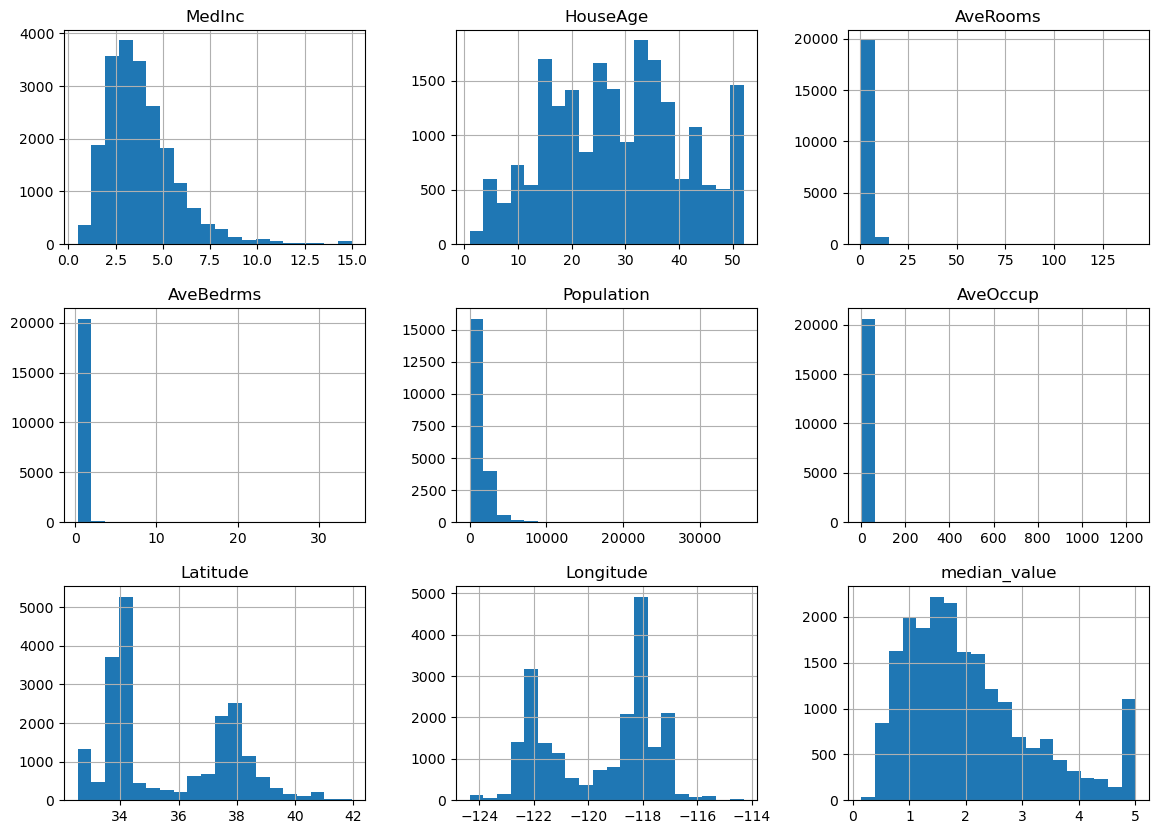

In [6]:
df.hist(bins= 20, figsize= (14, 10));

### Calculate correlation value between each feature and target

In [7]:
df.corr()['median_value'].abs().sort_values(ascending= False)

median_value    1.000000
MedInc          0.688075
AveRooms        0.151948
Latitude        0.144160
HouseAge        0.105623
AveBedrms       0.046701
Longitude       0.045967
Population      0.024650
AveOccup        0.023737
Name: median_value, dtype: float64

### Select a single feature

In [8]:
X = df[['MedInc', 'AveRooms']]
y = df['median_value']

### Construct training and testing data sets

In [9]:
X_train = X.iloc[0:-20]#.values.reshape(-1, 1)
X_test = X.iloc[-20:]#.values.reshape(-1, 1)

y_train = y.iloc[0:-20]#.values.reshape(-1, 1)
y_test = y.iloc[-20:]#.values.reshape(-1, 1)

#### Fit Linear Regression model on Training data

In [10]:
# fit model on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Use model to make predictions on Test data

In [11]:
preds = model.predict(X_test)

In [12]:
preds[:10]

array([2.41902955, 1.32130478, 1.46173076, 1.62716207, 1.70792937,
       2.10893531, 1.28612924, 1.66700403, 1.52286283, 1.2947694 ])

#### Display coefficient $\theta$ and RMSE from model

In [13]:
model.coef_, np.sqrt(mean_squared_error(y_test, preds))

(array([ 0.43400413, -0.03803489]), 0.7273901799712139)

ValueError: x and y must be the same size

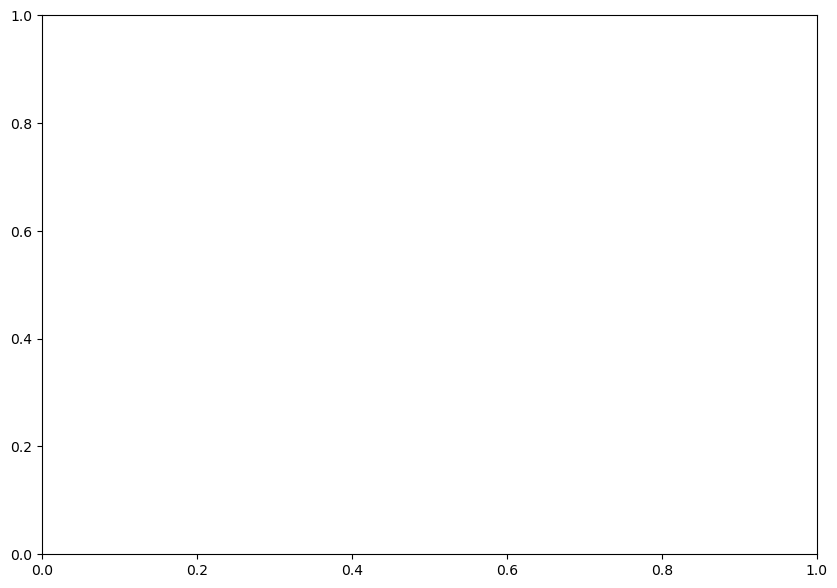

In [14]:
plt.figure(figsize= (10, 7))
plt.scatter(x= X_train, y= y_train, label= 'Median Income')
plt.plot(X_train, model.predict(X_train), 'r-', label= 'Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Value')
plt.legend()
plt.show()

# Normal Equation:  $\theta = (X^T X)^{-1} X^T y$ 

In [15]:
X_p = np.c_[np.ones(shape= (X_train.shape[0], 1)), X_train]

theta_vec = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_p.T, X_p)), X_p.T), y_train)

In [16]:
X_p

array([[1.        , 8.3252    , 6.98412698],
       [1.        , 8.3014    , 6.23813708],
       [1.        , 7.2574    , 8.28813559],
       ...,
       [1.        , 3.3021    , 4.92105263],
       [1.        , 2.25      , 5.89380531],
       [1.        , 2.7303    , 6.38851351]])

In [17]:
print(f'Intercept found from LinearRegression: {model.intercept_}')
print(f'Intercept from analytical solution: {theta_vec[0]}')
print(f'Difference from analytical solution: {theta_vec[0] - model.intercept_}')

Intercept found from LinearRegression: 0.5957796329776994
Intercept from analytical solution: 0.5957796329776961
Difference from analytical solution: -3.3306690738754696e-15


In [18]:
print(f'Coefficients found from LinearRegression')
[print(f'\t{theta}') for theta in model.coef_];

print(f'Coefficients found from Closed Form Solution')
[print(f'\t{theta}') for theta in theta_vec[1:]];

print(f'Difference between solutions\' coefficients')
[print(f'\t{delta_theta}') for delta_theta in theta_vec[1:] - model.coef_];

Coefficients found from LinearRegression
	0.4340041327912958
	-0.03803489468931013
Coefficients found from Closed Form Solution
	0.43400413279129657
	-0.03803489468931006
Difference between solutions' coefficients
	7.771561172376096e-16
	6.938893903907228e-17
